In [25]:
import numpy as nmp
import pandas as pnd
from matplotlib import pyplot as pltt
#Load data set and display first few observations
dataset = pd.read_csv("Diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# Summary statistics (mean, stdev, min, max)
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
# Define categorical outcome 
y1 = dataset.iloc[:,8]
# Define features
x1 = dataset.iloc[:,0:8]
# Standardize feature space to have mean 0 and variance 1
x_std = (x1-nmp.mean(x1,axis = 0))/nmp.std(x1,axis = 0)

In [28]:
#Find covariance matrix of x1
# Obtaining covariance matrix for x1
cov_matrix = nmp.cov(x_std, rowvar=False)
#covariance matrix is 8x8 since there are 8 features
print('Covariance matrix of x1: \n%s' %cov_matrix)

Covariance matrix of x1: 
[[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


In [29]:
#Obtain eigenvectors and eigenvalues
eigenvalue, eigenvector, = np.linalg.eig(cov_matrix)
# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(x1): \n%s' %eigenvector)
# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(x1): \n%s' %eigenvalue)

Eigenvectors of Cov(x1): 
[[ 0.1284321   0.59378583  0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [ 0.39308257  0.17402908  0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [ 0.36000261  0.18389207  0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [ 0.43982428 -0.33196534 -0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [ 0.43502617 -0.25078106  0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [ 0.45194134 -0.1009598   0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [ 0.27061144 -0.122069    0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [ 0.19802707  0.62058853 -0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]

Eigenvalues of Cov(x1): 
[2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


In [30]:
#Sort eigenvalues in descending order
eig_pair = [(eigenvalue[index], eigenvector[:,index]) for index in range(len(eigenvalue))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pair.sort()
eig_pair.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalue_sort = [eig_pair[index][0] for index in range(len(eigenvalue))]
eigvector_sort = [eig_pair[index][1] for index in range(len(eigenvalue))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalue_sort)

Eigenvalues in descending order: 
[2.0971105579945224, 1.7334672594471274, 1.0309722810083821, 0.8766705419094798, 0.7633383156496728, 0.6835183858447285, 0.4203635280495676, 0.40498937781489824]


Cumulative proportion of variance explained vector is: 
[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


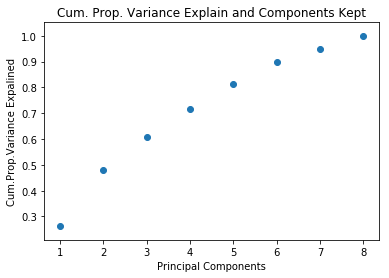

In [31]:
#Find cumulative variance of each principle component
varcompsum = nmp.cumsum(eigvalue_sort)/sum(eigvalue_sort)
#Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector is: \n%s" %varcompsum)
# x-axis for number of principal components kept
numcomp = range(1,len(eigvalue_sort)+1)
#title
plt.title('Cum. Prop. Variance Explain and Components Kept')
#xlabel
plt.xlabel('Principal Components')
#ylabel
plt.ylabel('Cum.Prop.Variance Expalined')
#Scatter plot of cumulative variance explained and principal components 
plt.scatter(numcomp, varcompsum)
#Show scattor plot
plt.show()

In [32]:
# Keep the first two principal components P_reduce is 8 x 2 matrix
preduce = nmp.array(eigvector_sort[0:2]).transpose()
projdata = nmp.dot(x_std,preduce)

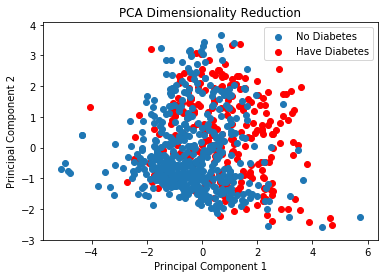

In [33]:
# Plot projected the data
pos = pltt.scatter(projdata[:,0][y1 == 1], projdata[:,1][y1 == 1], color = "red")
# Plot projected the data 
neg = pltt.scatter(projdata[:,0][y1 == 0], projdata[:,1][y1 == 0])
#title
pltt.title('PCA Dimensionality Reduction')
#xlabel
pltt.xlabel('Principal Component 1')
#y label
pltt.ylabel('Principal Component 2')
#legend
pltt.legend([neg,pos],["No Diabetes", "Have Diabetes"])
pltt.show()